In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics
from math import pow

In [2]:
pCross = 0.7 #probabilitas pindah silang / menghasilkan offspring
pMutasi = 0.03 #probabilitas mutasi
popSize = 30 #jumlah individu dalam satu populasi
pKrom = 20 #panjang satu gen, berarti panjang 1 kromosom adalah 2*pKrom
pointpotong = 4 #jumlah titik pada pindah silang
batas = (2*pKrom) -1
while (pointpotong < 1 or pointpotong > batas):
    print ("Maaf titik pindah silang harus bernilai minimal 1 dan tidak lebih dari jumlah bit kromosom")
    pointpotong = int(input())

In [3]:
class individu:
    def __init__(self, representasi):
        self.biner = representasi
        self.ra = representasi[:pKrom]
        self.rb = representasi[pKrom:]        
    
    def setA(self, iniA):
        self.a = iniA
    def setB(self, iniB):
        self.b = iniB
    
    def getA(self):
        return self.a
    def getB(self):
        return self.b
    def getRA(self):
        return self.ra
    def getRB(self):
        return self.rb
    
    def setNilai(self, iniNilai):
        self.nilai = iniNilai
    def getNilai(self):
        return self.nilai
    
    def getFit(self):
        return self.fit
    def setFit(self, iniFit):
        self.fit = iniFit+162.9
        
    def setPeluangFit(self, total):
        self.peluangFit = self.fit / total
    def getPeluangFit(self):
        return self.peluangFit
    
    def getRepresentasi(self):
        return self.biner
        
def fungsi_hitung(a, b):
        return ( ((4 - ( 2.1*pow(a, 2) ) + (pow(a, 4)/3)  )*pow(a, 2) )+ (a*b) + ( (-4 + (4*pow(b, 2)))*pow(b, 2) ) )

def encoding_biner(arr, rmin, rmax, N):
    return (rmin + ((( rmax - rmin )/ sum([2**(-(i+1)) for i in range(N)]) ) * sum([(arr[i]*(2**(-(i+1)))) for i in range(N)])))

def generate_populasi(size):
    pop = []
    for i in range(size): 
        ind = individu(np.random.randint(2, size=(2*pKrom)))
        ind.setA(encoding_biner(ind.getRA(), -3, 3, pKrom))
        ind.setB(encoding_biner(ind.getRB(), -2, 2, pKrom))
        ind.setNilai(fungsi_hitung(ind.getA(), ind.getB()))
        ind.setFit(-1*ind.getNilai())
        pop.append(ind)
    return pop

def totalFitness(semua_populasi):
    totalFitness = 0
    for i in range (len(semua_populasi)):
        totalFitness += (semua_populasi[i].getFit())
    return totalFitness  

#PAKAI ROULLETE WHEEL
def seleksi_ortu(semua_populasi):
    r = random.uniform(0, 1)
    i = 0
    while (r > 0 and i < len(semua_populasi)-1):
        r -= semua_populasi[i].getPeluangFit()
        i += 1
    return i

def cekKesamaan(darisilist, pembanding):
    for i in range (len(darisilist)):
        if (pembanding == darisilist[i]):
            return True
    return False

def rekombinasi(ayah, bunda, jumlahtitik):
    rand = random.random()
    garispotong = []
    if rand <= pCross:
        for i in range(jumlahtitik):
            slicePoint = np.random.randint(0,batas-1)
            while (cekKesamaan(garispotong, slicePoint) or (slicePoint == 0)):
                slicePoint = np.random.randint(0,batas-1)
            garispotong.append(slicePoint)
        garispotong.sort()  
        
        percobaan1 = []
        percobaan2 = []
        percobaan1.append(ayah[:garispotong[0]])
        percobaan2.append(bunda[:garispotong[0]])
        for i in range (jumlahtitik-1):
            if (i % 2 == 1):
                percobaan1.append(ayah[garispotong[i]:garispotong[i+1]])
                percobaan2.append(bunda[garispotong[i]:garispotong[i+1]])
            else:
                percobaan2.append(ayah[garispotong[i]:garispotong[i+1]])
                percobaan1.append(bunda[garispotong[i]:garispotong[i+1]])
        if (jumlahtitik % 2 == 1):        
            percobaan2.append(ayah[garispotong[len(garispotong)-1]:])
            percobaan1.append(bunda[garispotong[len(garispotong)-1]:])
        else:
            percobaan1.append(ayah[garispotong[len(garispotong)-1]:])
            percobaan2.append(bunda[garispotong[len(garispotong)-1]:])
        kakak = np.concatenate((percobaan1))
        adik = np.concatenate((percobaan2))

    else:
        kakak = ortu1.copy()
        adik = ortu2.copy()
    return kakak, adik

def mutasi(kromosom):
    for i in range (len(kromosom)):
        rand = random.random()
        if rand <= pMutasi:
            kromosom[i] = 1 - kromosom[i]
    return kromosom

def tampilkan_populasi(arr):    
    for i in range(len(arr)):
        print("Kromosom               ", "Nilai x1     ", "Encoding x1     ", "Nilai x2     ", "Encoding x2     ", "Hasil FUnction     ", "Fitness" )
        print(arr[i].getRepresentasi(),arr[i].getA(), encoding_biner(arr[i].getRA(), -3, 3, pKrom), arr[i].getB(), encoding_biner(arr[i].getRB(), -2, 2, pKrom) ,  arr[i].getNilai() )

def cek_konvergen(arr):
    cek_nilai = []
    for i in range (len(arr)):
        cek_nilai.append(arr[i].getNilai())
    sd = statistics.stdev(cek_nilai)
    if (sd <= 0.0000000001):
        return True
    else:
        return False
        

pop = generate_populasi(popSize)
ToFit = totalFitness(pop)

for i in range(popSize):
    pop[i].setPeluangFit(ToFit)

pop.sort(key=lambda x: x.fit, reverse=True)



Generasi ke- 1
Individu Terbaik :  [0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 0]
Gen 1 : [0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0] Gen 2 : [0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0]
x1 :  -0.105374436736 x2 : -0.291212359631
Nilai Fungsi :  -0.235608281328
Fitness:  163.135608281


Generasi ke- 2
Individu Terbaik :  [0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0]
Gen 1 : [0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1] Gen 2 : [1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0]
x1 :  -0.330050783206 x2 : 0.752726319052
Nilai Fungsi :  -0.819452026281
Fitness:  163.719452026


Generasi ke- 3
Individu Terbaik :  [1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 1 1]
Gen 1 : [1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1] Gen 2 : [1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1]
x1 :  0.0737429368429 x2 : 0.686094938369
Nilai Fungsi :  -0.924287502725
Fitness:  163.824287503


Generasi ke- 4
Individu Terbaik :  [1 0 0 0 0

Generasi ke- 48
Individu Terbaik :  [0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 0 0]
Gen 1 : [0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0] Gen 2 : [1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0]
x1 :  -0.0897532365353 x2 : 0.712633812555
Nilai Fungsi :  -1.03162842059
Fitness:  163.931628421


Generasi ke- 49
Individu Terbaik :  [0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 0 0]
Gen 1 : [0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0] Gen 2 : [1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0]
x1 :  -0.0897532365353 x2 : 0.712633812555
Nilai Fungsi :  -1.03162842059
Fitness:  163.931628421


Generasi ke- 50
Individu Terbaik :  [0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 0 0]
Gen 1 : [0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0] Gen 2 : [1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0]
x1 :  -0.0897532365353 x2 : 0.712633812555
Nilai Fungsi :  -1.03162842059
Fitness:  163.931628421


Generasi ke- 51
Individu Terbaik :  [0 1 1 

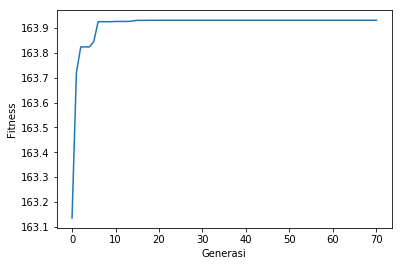

In [4]:
lFit = []
gen = 1
while not (cek_konvergen(pop)):

    newPop = []
    
    #Elitism
    newPop.append(pop[0])
    newPop.append(pop[1])

    while (len(newPop) < len(pop)):
        #pilih orang tua
        ido1 = seleksi_ortu(pop)
        ido2 = seleksi_ortu(pop)
        if (ido1 == ido2):
            while (ido1 == ido2):
                ido2 = seleksi_ortu(pop)
        ortu1 = pop[ido1].getRepresentasi()
        ortu2 = pop[ido2].getRepresentasi()
        
        #CrossOver
        anak1, anak2 = rekombinasi(ortu1, ortu2, pointpotong)
            
        #Mutasi
        anak1 = mutasi(anak1)
        anak2 = mutasi(anak2)
        
        indA1 = individu(anak1)
        indA1.setA(encoding_biner(indA1.getRA(), -3, 3, pKrom))
        indA1.setB(encoding_biner(indA1.getRB(), -2, 2, pKrom))
        indA1.setNilai(fungsi_hitung(indA1.getA(), indA1.getB()))
        indA1.setFit(-1*indA1.getNilai())
        
        indA2 = individu(anak2)
        indA2.setA(encoding_biner(indA2.getRA(), -3, 3, pKrom))
        indA2.setB(encoding_biner(indA2.getRB(), -2, 2, pKrom))
        indA2.setNilai(fungsi_hitung(indA2.getA(), indA2.getB()))
        indA2.setFit(-1*indA2.getNilai())
        
        newPop.append(indA1)
        newPop.append(indA2)   
    
    semua = pop + newPop
    
    #sorting array dari objek individu berdasarkan nilai Fitnessnya
    semua.sort(key=lambda x: x.fit, reverse=True)
    
    #untuk populasi selanjutnya, diisi dengan individu dengan nilai fitness yang paling tinggi
    pop = []
    for i in range(popSize):
        pop.append(semua[i])
    
    #hitung kembali total Fitness semuanya untuk menentukan peluang untuk pemilihan seleksi orang tua di generasi selanjutnya
    ToFit = totalFitness(pop)
    for i in range(len(pop)):
        pop[i].setPeluangFit(ToFit)
        
    #tampilkan individu terbaik di generasi saat ini 
    print("Generasi ke-",gen)
    print("Individu Terbaik : ",pop[0].getRepresentasi())
    print("Gen 1 :", pop[0].getRA(), "Gen 2 :", pop[0].getRB())
    print("x1 : ", pop[0].getA(), "x2 :", pop[0].getB())
    print("Nilai Fungsi : ", pop[0].getNilai())
    print("Fitness: ", pop[0].getFit())
    print("")
    print("")
       
    #masukkan nilai fitness individu terbaik setiap generasi untuk plottingan grafik di akhir iterasi 
    lFit.append(pop[0].getFit())
    
    gen+= 1
plt.plot(lFit)
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.show()


    